<font size="7">Background & Context</font>

A pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

<font size="6">Objective</font>

- Explore and visualize the dataset.

- Build a linear regression model to predict the prices of used cars.

- Generate a set of insights and recommendations that will help the business.

<font size="6">Data Dictionary</font>

S.No. : Serial Number

Name : Name of the car which includes Brand name and Model name

Location : The location in which the car is being sold or is available for purchase Cities

Year : Manufacturing year of the car

Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.

Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

Transmission : The type of transmission used by the car. (Automatic / Manual)

Owner : Type of ownership

Mileage : The standard mileage offered by the car company in kmpl or km/kg

Engine : The displacement volume of the engine in CC.

Power : The maximum power of the engine in bhp.

Seats : The number of seats in the car.

New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)

Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

<font size="6">Loading libraries</font>

In [85]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms

In [86]:
df = pd.read_csv("used_cars_data.csv")
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  

np.random.seed(1) 
df.sample(n=10)

There are 7253 rows and 14 columns.


S.No.                                       Name    Location  Year  \
2397   2397             Ford EcoSport 1.5 Petrol Trend     Kolkata  2016   
3777   3777                     Maruti Wagon R VXI 1.2       Kochi  2015   
4425   4425                     Ford Endeavour 4x2 XLT   Hyderabad  2007   
3661   3661  Mercedes-Benz E-Class E250 CDI Avantgrade  Coimbatore  2016   
4514   4514       Hyundai Xcent 1.2 Kappa AT SX Option       Kochi  2016   
599     599             Toyota Innova Crysta 2.8 ZX AT  Coimbatore  2019   
186     186  Mercedes-Benz E-Class E250 CDI Avantgrade   Bangalore  2014   
305     305     Audi A6 2011-2015 2.0 TDI Premium Plus       Kochi  2014   
4582   4582                      Hyundai i20 1.2 Magna     Kolkata  2011   
5434   5434           Honda WR-V Edge Edition i-VTEC S       Kochi  2019   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
2397              21460    Petrol       Manual      First   17.0 kmpl   
3777              49818    Petrol       Manual      First   21.5 kmpl   
4425             130000    Diesel       Manual      First   13.1 kmpl   
3661              39753    Diesel    Automatic      First   13.0 kmpl   
4514              45560    Petrol    Automatic      First   16.9 kmpl   
599               40674    Diesel    Automatic      First  11.36 kmpl   
186               37382    Diesel    Automatic      First   13.0 kmpl   
305               61726    Diesel    Automatic      First  17.68 kmpl   
4582              36000    Petrol       Manual      First   18.5 kmpl   
5434              13913    Petrol       Manual      First   17.5 kmpl   

       Engine       Power  Seats   New_Price  Price  
2397  1497 CC  121.36 bhp    5.0   9.47 Lakh   6.00  
3777  1197 CC   81.80 bhp    5.0   5.44 Lakh   4.11  
4425  2499 CC     141 bhp    7.0         NaN   6.00  
3661  2143 CC   201.1 bhp    5.0         NaN  35.28  
4514  1197 CC      82 bhp    5.0         NaN   6.34  
599   2755 CC   171.5 bhp    7.0  28.05 Lakh  24.82  
186   2143 CC   201.1 bhp    5.0         NaN  32.00  
305   1968 CC  174.33 bhp    5.0         NaN  20.77  
4582  1197 CC      80 bhp    5.0         NaN   2.50  
5434  1199 CC    88.7 bhp    5.0   9.36 Lakh   8.20

<mark>S.No.</mark> is just an index for the data entry. In all likelihood, this column will not be a significant factor in determining the price of the car. Having said that, there are instances where the index of the data entry contains the information about time factor (an entry with a smaller index corresponds to data entered years ago). Therefore, we will not drop this variable just yet. Let us see if there is any relationship with the price when we do bivariate analysis.

<mark>Car names</mark> contain a lot of model information. Let us check how many individual names we have. If they are too many, we can process this column to extract important information.

<mark>Mileage</mark>, <mark>Engine</mark> and <mark>Power</mark> will also need some processing before we are able to explore them. We'll have to extract numerical information from these columns.
7
<mark>New Price</mark> column also needs some processing. This one also contains strings and a lot of missing values.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


As expected, <mark>Mileage</mark>, <mark>Engine</mark>, <mark>Power</mark> and <mark>New_Price</mark> are objects when they should ideally be numerical. To be able to get summary statistics for these columns, We will have to process them first.

<font size="6">Processing Columns</font>

Let us process 'Mileage', 'Engine', 'Power' and 'New_Price' and extract numerical values from them.

<font size="5">1. Mileage</font>

I've a car mileage in two units, kmpl and km/kg.

After a quick research on the internet it is clear that these 2 units are used for cars of 2 different fuel types.

kmpl - kilometers per litre - is used for petrol and diesel cars. km/kg - kilometers per kg - is used for CNG and LPG based engines.

We have the variable <mark>Fuel_type</mark> in our data. Let us check if this observations holds true in our data also.

In [88]:
km_per_unit_fuel = []
mileage_unit = []

for observation in df['Mileage']:
    if isinstance(observation, str):
        if (
            observation.split(" ")[0]
            .replace('.', "", 1)
            .isdigit() 
            and " " in observation 
            and (
                observation.split(" ")[1] == "kmpl"
                or observation.split(" ")[1] == "km/kg"
            )
        ):
            km_per_unit_fuel.append(float(observation.split(" ")[0]))
            mileage_unit.append(observation.split(" ")[1])
        else:
            # To detect if there are any observations in the column that do not follow
            # the expected format [number + ' ' + 'kmpl' or 'km/kg']
            print(
                "The data needs further processing. All values are not similar ", observation
            )
    else:
        km_per_unit_fuel.append(np.nan)
        mileage_unit.append(np.nan)

In [89]:
df["km_per_unit_fuel"] = km_per_unit_fuel
df["mileage_unit"] = mileage_unit

df.head(5)

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  km_per_unit_fuel mileage_unit  
0  58.16 bhp    5.0        NaN   1.75             26.60        km/kg  
1  126.2 bhp    5.0        NaN  12.50             19.67         kmpl  
2   88.7 bhp    5.0  8.61 Lakh   4.50             18.20         kmpl  
3  88.76 bhp    7.0        NaN   6.00             20.77         kmpl  
4  140.8 bhp    5.0        NaN  17.74             15.20         kmpl

In [90]:
df.groupby(by=["Fuel_Type", "mileage_unit"]).size()

Fuel_Type  mileage_unit
CNG        km/kg             62
Diesel     kmpl            3852
LPG        km/kg             12
Petrol     kmpl            3325
dtype: int64

As expected, km/kg is for CNG/LPG cars and kmpl is for Petrol and Diesel cars

<font size="5">2. Engine</font>

The data dictionary suggests that <mark>Engine</mark> indicates the displacement volume of the engine in CC. I will make sure that all the observations follow the same format - [numeric + " " + "CC"] and create a new numeric column from this column.

This time, I will use a regrex to make all the neccesary checks.

In [91]:
import re

engine_num = []

# Regex for numeric + " " + "CC"
regex_engine = "^\d+(\.\d+)? CC$"

for observation in df['Engine']:
    if isinstance(observation, str):
        if re.match(regex_engine, observation):
            engine_num.append(float(observation.split(" ")[0]))
        else:
            # To detect if there are any observations in the column that do not follow
            print(
                "The data needs further processing. All values are not similar ", observation
            )
    else:
        engine_num.append(np.nan)

In [92]:
df['engine_num'] = engine_num

# Checking the new dataframe
df.head(5)

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  km_per_unit_fuel mileage_unit  \
0  58.16 bhp    5.0        NaN   1.75             26.60        km/kg   
1  126.2 bhp    5.0        NaN  12.50             19.67         kmpl   
2   88.7 bhp    5.0  8.61 Lakh   4.50             18.20         kmpl   
3  88.76 bhp    7.0        NaN   6.00             20.77         kmpl   
4  140.8 bhp    5.0        NaN  17.74             15.20         kmpl   

   engine_num  
0       998.0  
1      1582.0  
2      1199.0  
3      1248.0  
4      1968.0

<font size="5">3. Power</font>

The data dictionary suggests that <mark>Power</mark> indicates the maximum power of the engine in bhp. I will make sure that all the observations follow the same format - [numeric + " " + "bhp"] and create a new numeric column from this column, like we did for <mark>Engine</mark>

In [93]:
power_num = []


regex_power = "^\d+(\.\d+)? bhp$"


for observation in df['Power']:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            power_num.append(float(observation.split(" ")[0]))
        else:
            print(
                "The data needs further processing. All values are not similar ", observation
            )
    else:
        power_num.append(np.nan)

The data needs further processing. All values are not similar  null bhp
The data needs further processing. All values are not similar  null bhp
The data needs further processing. All values are not similar  null bhp
The data needs further processing. All values are not similar  null bhp
The data needs further processing. All values are not similar  null bhp
The data needs further processing. All values are not similar  null bhp
The data needs further processing. All values are not similar  null bhp
The data needs further processing. All values are not similar  null bhp
The data needs further processing. All values are not similar  null bhp
The data needs further processing. All values are not similar  null bhp
The data needs further processing. All values are not similar  null bhp
The data needs further processing. All values are not similar  null bhp
The data needs further processing. All values are not similar  null bhp
The data needs further processing. All values are not similar  n

In [94]:
power_num = []

for observation in df["Power"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            power_num.append(float(observation.split(" ")[0]))
        else:
            power_num.append(np.nan)
    else:
        power_num.append(np.nan)
        
df["power_num"] = power_num

# Checking the new dataframe
df.head(10) # looks good now

S.No.                                 Name    Location  Year  \
0      0               Maruti Wagon R LXI CNG      Mumbai  2010   
1      1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                         Honda Jazz V     Chennai  2011   
3      3                    Maruti Ertiga VDI     Chennai  2012   
4      4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
5      5      Hyundai EON LPG Era Plus Option   Hyderabad  2012   
6      6               Nissan Micra Diesel XV      Jaipur  2013   
7      7    Toyota Innova Crysta 2.8 GX AT 8S      Mumbai  2016   
8      8  Volkswagen Vento Diesel Comfortline        Pune  2013   
9      9       Tata Indica Vista Quadrajet LS     Chennai  2012   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   
5              75000       LPG       Manual      First  21.1 km/kg   814 CC   
6              86999    Diesel       Manual      First  23.08 kmpl  1461 CC   
7              36000    Diesel    Automatic      First  11.36 kmpl  2755 CC   
8              64430    Diesel       Manual      First  20.54 kmpl  1598 CC   
9              65932    Diesel       Manual     Second   22.3 kmpl  1248 CC   

       Power  Seats  New_Price  Price  km_per_unit_fuel mileage_unit  \
0  58.16 bhp    5.0        NaN   1.75             26.60        km/kg   
1  126.2 bhp    5.0        NaN  12.50             19.67         kmpl   
2   88.7 bhp    5.0  8.61 Lakh   4.50             18.20         kmpl   
3  88.76 bhp    7.0        NaN   6.00             20.77         kmpl   
4  140.8 bhp    5.0        NaN  17.74             15.20         kmpl   
5   55.2 bhp    5.0        NaN   2.35             21.10        km/kg   
6   63.1 bhp    5.0        NaN   3.50             23.08         kmpl   
7  171.5 bhp    8.0    21 Lakh  17.50             11.36         kmpl   
8  103.6 bhp    5.0        NaN   5.20             20.54         kmpl   
9     74 bhp    5.0        NaN   1.95             22.30         kmpl   

   engine_num  power_num  
0       998.0      58.16  
1      1582.0     126.20  
2      1199.0      88.70  
3      1248.0      88.76  
4      1968.0     140.80  
5       814.0      55.20  
6      1461.0      63.10  
7      2755.0     171.50  
8      1598.0     103.60  
9      1248.0      74.00

<font size="5">4. New_Price</font>

I know that <mark>New_Price</mark> is the price of a new car of the same model in INR Lakhs.(1 Lakh = 100,000)

This column clearly has a lot of missing values. I will impute the missing values later. For now I will only extract the numeric values from this column.

In [95]:
new_price_num = []

regex_price = "^\d+(\.\d+)? Lakh$"

for observation in df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_price, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            print(
                "The data needs further processing. All values are not similar ", observation
            )
    else:
        new_price_num.append(np.nan)

The data needs further processing. All values are not similar  1.28 Cr
The data needs further processing. All values are not similar  1.04 Cr
The data needs further processing. All values are not similar  1 Cr
The data needs further processing. All values are not similar  1.04 Cr
The data needs further processing. All values are not similar  1.39 Cr
The data needs further processing. All values are not similar  1.02 Cr
The data needs further processing. All values are not similar  1.4 Cr
The data needs further processing. All values are not similar  1.06 Cr
The data needs further processing. All values are not similar  1.27 Cr
The data needs further processing. All values are not similar  1.13 Cr
The data needs further processing. All values are not similar  1.36 Cr
The data needs further processing. All values are not similar  1.66 Cr
The data needs further processing. All values are not similar  1.6 Cr
The data needs further processing. All values are not similar  1.28 Cr
The data ne

Not all values are in Lakhs. There are few observations that are in Crores as well.

Let us convert these to Lakhs. 1Cr = 100 Lakhs

In [96]:
new_price_num = []

for observation in df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_price, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            new_price_num.append(float(observation.split(" ")[0]) * 100)
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

df["new_price_num"] = new_price_num

df.head(5) # looks okay

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  km_per_unit_fuel mileage_unit  \
0  58.16 bhp    5.0        NaN   1.75             26.60        km/kg   
1  126.2 bhp    5.0        NaN  12.50             19.67         kmpl   
2   88.7 bhp    5.0  8.61 Lakh   4.50             18.20         kmpl   
3  88.76 bhp    7.0        NaN   6.00             20.77         kmpl   
4  140.8 bhp    5.0        NaN  17.74             15.20         kmpl   

   engine_num  power_num  new_price_num  
0       998.0      58.16            NaN  
1      1582.0     126.20            NaN  
2      1199.0      88.70           8.61  
3      1248.0      88.76            NaN  
4      1968.0     140.80            NaN

<font size="7">Feature Engineering</font>

The <mark>Name</mark> column in the current format might not be very useful in our analysis. Since the name contains both the brand name and the model name of the vehicle, the column would have to many unique values to be useful in prediction.

In [97]:
df["Name"].nunique()

2041

With 2041 unique names, car names are not going to be great predictors of the price in our current data.

But we can process this column to extract important information and see if that reduces the number of levels for this information.

<font size="5">1. Car Brand Name</font>

In [98]:
# Extract Brand Names
df["Brand"] = df["Name"].apply(lambda x: x.split(" ")[0].lower())

df["Brand"].value_counts()

Brand
maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               312
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
ambassador          1
smart               1
lamborghini         1
hindustan           1
opelcorsa           1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Brand'>

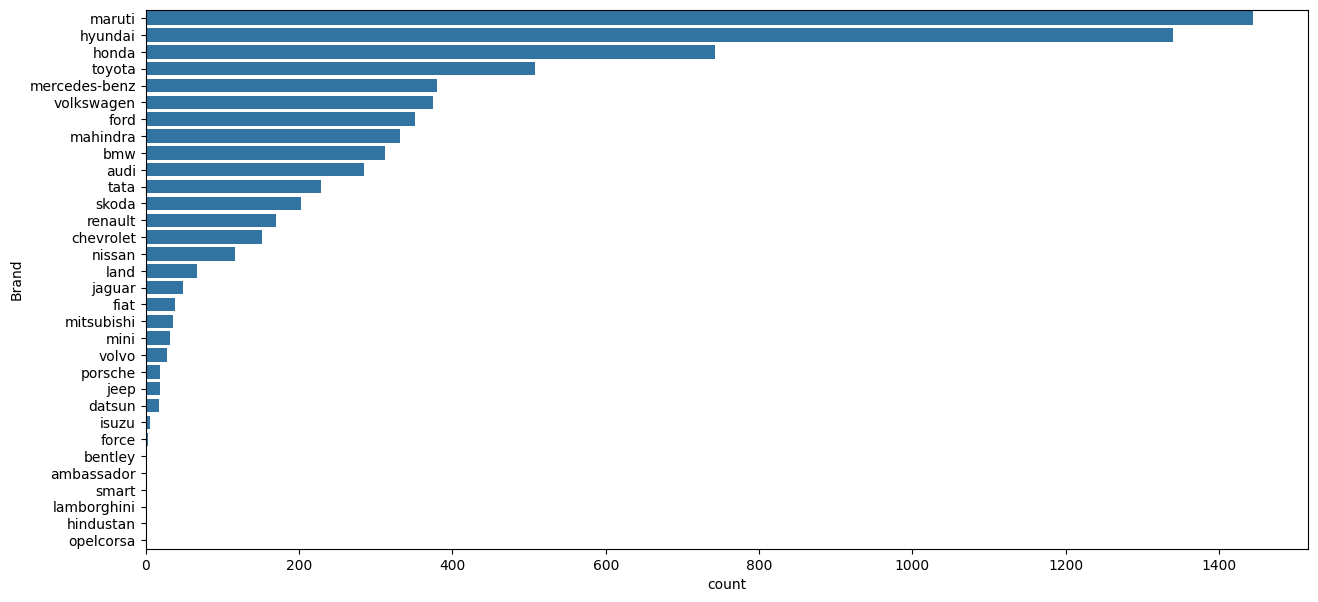

In [99]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, y="Brand", order=df["Brand"].value_counts().index)

<font size="5">2. Car Model Name</font>

In [100]:
# Extract Model Name
df["Model"] = df["Name"].apply(lambda x: x.split(" ")[1].lower())

df["Model"].value_counts()

Model
swift          418
city           318
i20            303
innova         203
verna          200
              ... 
cls-class        1
continental      1
wr-v             1
abarth           1
1.4gsi           1
Name: count, Length: 218, dtype: int64

<Axes: xlabel='count', ylabel='Model'>

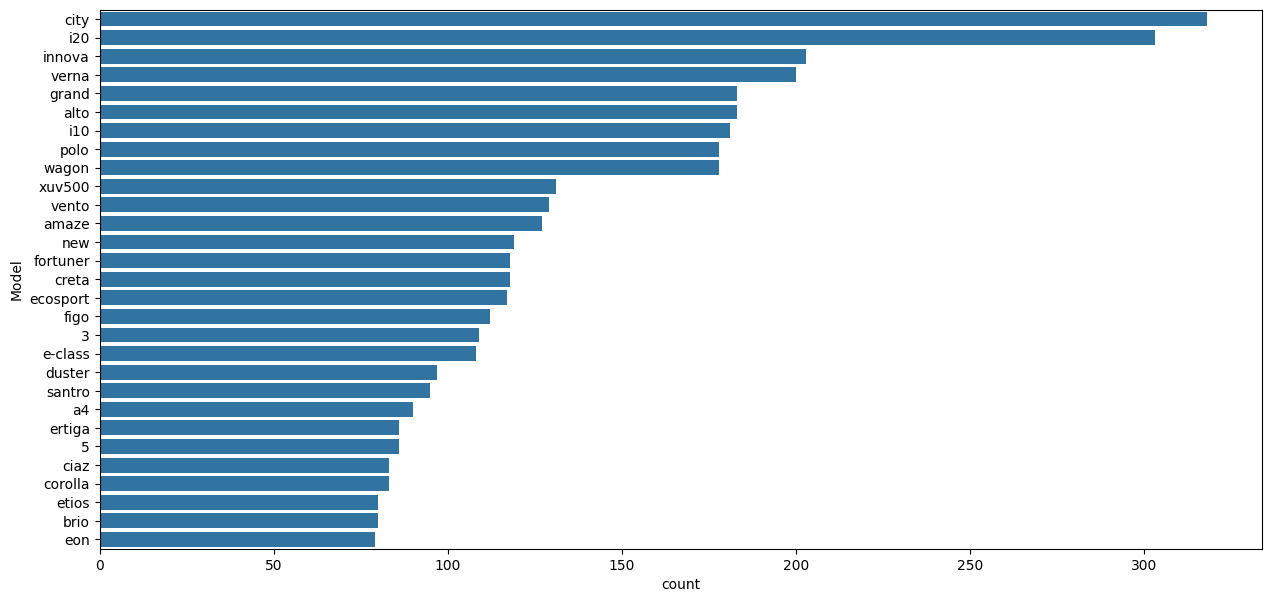

In [101]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, y="Model", order=df["Model"].value_counts().index[1:30])

It is clear from the above charts that out dataset contains used cars from luxury as well as budget friendly brands.

I can create a new variable using this information. I will bin all cars in 3 categories -

1. Budget Friendly
2. Mid Range
3. Luxury Cars

<font size="5">3. Car_category</font>

In [102]:
df.groupby("Brand")["Price"].mean().sort_values(ascending=False)

Brand
lamborghini      120.000000
bentley           59.000000
porsche           48.348333
land              39.259500
jaguar            37.632250
mini              26.896923
mercedes-benz     26.809874
audi              25.537712
bmw               25.243146
volvo             18.802857
jeep              18.718667
isuzu             14.696667
toyota            11.580024
mitsubishi        11.058889
force              9.333333
mahindra           8.045919
skoda              7.559075
ford               6.889400
renault            5.799034
honda              5.411743
hyundai            5.343433
volkswagen         5.307270
nissan             4.738352
maruti             4.517267
tata               3.562849
fiat               3.269286
datsun             3.049231
chevrolet          3.044463
smart              3.000000
ambassador         1.350000
hindustan               NaN
opelcorsa               NaN
Name: Price, dtype: float64

The output is very close to our expectation (domain knowledge), in terms of brand ordering. Mean price of a used Lamborghini is 120 Lakhs and that of cars from other luxury brands follow in a descending order.

Towards the bottom end there are more budget friendly brands.

We can see that there is some missingness in our data. I will come back to creating this variable once we have removed missingness from the data.

<font size="7">Exploratory Data Analysis</font>

In [103]:
df.describe().T

count          mean           std      min        25%  \
S.No.              7253.0   3626.000000   2093.905084     0.00   1813.000   
Year               7253.0   2013.365366      3.254421  1996.00   2011.000   
Kilometers_Driven  7253.0  58699.063146  84427.720583   171.00  34000.000   
Seats              7200.0      5.279722      0.811660     0.00      5.000   
Price              6019.0      9.479468     11.187917     0.44      3.500   
km_per_unit_fuel   7251.0     18.141580      4.562197     0.00     15.170   
engine_num         7207.0   1616.573470    595.285137    72.00   1198.000   
power_num          7078.0    112.765214     53.493553    34.20     75.000   
new_price_num      1006.0     22.779692     27.759344     3.91      7.885   

                        50%         75%         max  
S.No.               3626.00   5439.0000     7252.00  
Year                2014.00   2016.0000     2019.00  
Kilometers_Driven  53416.00  73000.0000  6500000.00  
Seats                  5.00      5.0000       10.00  
Price                  5.64      9.9500      160.00  
km_per_unit_fuel      18.16     21.1000       33.54  
engine_num          1493.00   1968.0000     5998.00  
power_num             94.00    138.1000      616.00  
new_price_num         11.57     26.0425      375.00

<font size="5">Observations</font>

1. S.No. clearly has no interpretation here but as discussed earlier let us drop it only after having looked at the initial linear model.
2. Kilometers_Driven values have an incredibly high range. We should check a few of the extreme values to get a sense of the data.
3. Minimum and maximum number of seats in the car also warrent a quick check. On an average a car seems to have 5 seats, which is about right.
4. We have used cars being sold at less than a lakh rupees and as high as 160 lakh, as we saw for Lamborghini earlier. We might have to drop some of these outliers to build a robust model.
5. Min Mileage being 0 is also concerning, We will have to check what is going on.
6. Engine and Power mean and median values are not very different. Only someone with more domain knowledge would be able to comment furthur on these attributes.
7. New price range seems right. I have both budget friendly Maruti cars and Lamborghinis in our stock. Mean being twice that of the median suggests that there are only a few very high range brands, which again makes sense.

In [104]:
# Checking Kilometers Driven extreme values
df.sort_values(by="Kilometers_Driven", ascending=False).head(10)

S.No.                                             Name   Location  Year  \
2328   2328                        BMW X5 xDrive 30d M Sport    Chennai  2017   
340     340           Skoda Octavia Ambition Plus 2.0 TDI AT    Kolkata  2013   
1860   1860                 Volkswagen Vento Diesel Highline    Chennai  2013   
358     358                            Hyundai i10 Magna 1.2    Chennai  2009   
2823   2823  Volkswagen Jetta 2013-2015 2.0L TDI Highline AT    Chennai  2015   
3092   3092                             Honda City i VTEC SV    Kolkata  2015   
4491   4491                   Hyundai i20 Magna Optional 1.2  Bangalore  2013   
6921   6921                      Maruti Swift Dzire Tour LDI     Jaipur  2012   
3649   3649                                   Tata Indigo LS     Jaipur  2008   
1528   1528      Toyota Innova 2.5 G (Diesel) 8 Seater BS IV  Hyderabad  2005   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
2328            6500000    Diesel    Automatic      First  15.97 kmpl   
340              775000    Diesel    Automatic      First   19.3 kmpl   
1860             720000    Diesel       Manual      First  20.54 kmpl   
358              620000    Petrol       Manual      First  20.36 kmpl   
2823             480000    Diesel    Automatic      First  16.96 kmpl   
3092             480000    Petrol       Manual      First   17.4 kmpl   
4491             445000    Petrol       Manual      First   18.5 kmpl   
6921             350000    Diesel       Manual      First   23.4 kmpl   
3649             300000    Diesel       Manual      First   17.0 kmpl   
1528             299322    Diesel       Manual      First   12.8 kmpl   

       Engine       Power  Seats New_Price  Price  km_per_unit_fuel  \
2328  2993 CC     258 bhp    5.0       NaN  65.00             15.97   
340   1968 CC     141 bhp    5.0       NaN   7.50             19.30   
1860  1598 CC   103.6 bhp    5.0       NaN   5.90             20.54   
358   1197 CC    78.9 bhp    5.0       NaN   2.70             20.36   
2823  1968 CC  138.03 bhp    5.0       NaN  13.00             16.96   
3092  1497 CC   117.3 bhp    5.0       NaN   5.00             17.40   
4491  1197 CC    82.9 bhp    5.0       NaN   4.45             18.50   
6921  1248 CC      74 bhp    5.0       NaN    NaN             23.40   
3649  1405 CC      70 bhp    5.0       NaN   1.00             17.00   
1528  2494 CC     102 bhp    8.0       NaN   4.00             12.80   

     mileage_unit  engine_num  power_num  new_price_num       Brand    Model  
2328         kmpl      2993.0     258.00            NaN         bmw       x5  
340          kmpl      1968.0     141.00            NaN       skoda  octavia  
1860         kmpl      1598.0     103.60            NaN  volkswagen    vento  
358          kmpl      1197.0      78.90            NaN     hyundai      i10  
2823         kmpl      1968.0     138.03            NaN  volkswagen    jetta  
3092         kmpl      1497.0     117.30            NaN       honda     city  
4491         kmpl      1197.0      82.90            NaN     hyundai      i20  
6921         kmpl      1248.0      74.00            NaN      maruti    swift  
3649         kmpl      1405.0      70.00            NaN        tata   indigo  
1528         kmpl      2494.0     102.00            NaN      toyota   innova

It looks like the first row here is a data entry error. A car manufactured as recently as 2017 having been driven 6500000 kms is almost impossible.

The other observations that follow are also on a higher end. There is a good chance that these are outliers. 
I'll look at this furthur while doing the univariate analysis.

In [105]:
# Checking Kilometers Driven extreme values
df.sort_values(by="Kilometers_Driven", ascending=True).head(10)

S.No.                                    Name   Location  Year  \
1361   1361           Maruti Alto 800 2016-2019 VXI     Mumbai  2019   
5606   5606              Maruti Wagon R ZXI AMT 1.2     Mumbai  2019   
5339   5339  Hyundai i20 Active SX Dual Tone Petrol       Pune  2019   
173     173        Hyundai Grand i10 1.2 Kappa Asta    Kolkata  2019   
2054   2054                  Maruti Ignis 1.2 Alpha     Mumbai  2017   
5941   5941                        Renault KWID RXL       Pune  2018   
1161   1161             Tata Tigor 1.2 Revotron XTA  Ahmedabad  2018   
6201   6201                         Maruti Alto LXI    Kolkata  2019   
1242   1242          Jaguar XE 2.0L Diesel Prestige      Delhi  2018   
1198   1198       Volkswagen Polo 1.0 MPI Trendline  Hyderabad  2019   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
1361                171    Petrol       Manual      First   24.7 kmpl   
5606                600    Petrol    Automatic      First   21.5 kmpl   
5339               1000    Petrol       Manual      First  17.19 kmpl   
173                1000    Petrol       Manual      First   18.9 kmpl   
2054               1000    Petrol       Manual      First  20.89 kmpl   
5941               1000    Petrol       Manual      First  25.17 kmpl   
1161               1000    Petrol    Automatic      First   20.3 kmpl   
6201               1000    Petrol       Manual      First   24.7 kmpl   
1242               1000    Diesel    Automatic      First   13.6 kmpl   
1198               1000    Petrol       Manual      First  18.78 kmpl   

       Engine      Power  Seats   New_Price  Price  km_per_unit_fuel  \
1361   796 CC   47.3 bhp    5.0         NaN   3.60             24.70   
5606  1197 CC  81.80 bhp    5.0    6.8 Lakh   6.25             21.50   
5339  1197 CC  81.86 bhp    5.0  10.25 Lakh   8.60             17.19   
173   1197 CC  81.86 bhp    5.0   7.39 Lakh   6.50             18.90   
2054  1197 CC  81.80 bhp    5.0   7.87 Lakh   6.36             20.89   
5941   799 CC   53.3 bhp    5.0   4.45 Lakh   3.40             25.17   
1161  1199 CC     84 bhp    5.0         NaN   6.85             20.30   
6201   796 CC   47.3 bhp    5.0   3.99 Lakh    NaN             24.70   
1242  1999 CC    177 bhp    5.0  52.77 Lakh  40.00             13.60   
1198   999 CC     75 bhp    5.0   6.74 Lakh   5.68             18.78   

     mileage_unit  engine_num  power_num  new_price_num       Brand  Model  
1361         kmpl       796.0      47.30            NaN      maruti   alto  
5606         kmpl      1197.0      81.80           6.80      maruti  wagon  
5339         kmpl      1197.0      81.86          10.25     hyundai    i20  
173          kmpl      1197.0      81.86           7.39     hyundai  grand  
2054         kmpl      1197.0      81.80           7.87      maruti  ignis  
5941         kmpl       799.0      53.30           4.45     renault   kwid  
1161         kmpl      1199.0      84.00            NaN        tata  tigor  
6201         kmpl       796.0      47.30           3.99      maruti   alto  
1242         kmpl      1999.0     177.00          52.77      jaguar     xe  
1198         kmpl       999.0      75.00           6.74  volkswagen   polo

After looking at the columns - Year, New Price and Price these entries seem feasible.

1000 might be default value in this case. Quite a few cars having driven exactly 1000 km is suspicious

In [106]:
# Check seats extreme values
df.sort_values(by="Seats", ascending=True).head(5)

S.No.                               Name   Location  Year  \
3999   3999  Audi A4 3.2 FSI Tiptronic Quattro  Hyderabad  2012   
1078   1078        Porsche Boxster S tiptronic    Kolkata  2015   
926     926         Porsche Cayman 2009-2012 S  Hyderabad  2010   
915     915                Smart Fortwo CDI AT       Pune  2008   
1288   1288                   Audi TT 2.0 TFSI      Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type    Mileage   Engine  \
3999             125000    Petrol    Automatic      First  10.5 kmpl  3197 CC   
1078              10512    Petrol    Automatic      First   8.6 kmpl  2706 CC   
926               10000    Petrol       Manual      First   9.0 kmpl  3436 CC   
915              103000    Diesel    Automatic     Second   0.0 kmpl   799 CC   
1288              14262    Petrol    Automatic      First   9.9 kmpl  1984 CC   

          Power  Seats New_Price  Price  km_per_unit_fuel mileage_unit  \
3999   null bhp    0.0       NaN  18.00              10.5         kmpl   
1078    265 bhp    2.0       NaN  64.00               8.6         kmpl   
926    null bhp    2.0       NaN  40.00               9.0         kmpl   
915    null bhp    2.0       NaN   3.00               0.0         kmpl   
1288  207.8 bhp    2.0       NaN  27.35               9.9         kmpl   

      engine_num  power_num  new_price_num    Brand    Model  
3999      3197.0        NaN            NaN     audi       a4  
1078      2706.0      265.0            NaN  porsche  boxster  
926       3436.0        NaN            NaN  porsche   cayman  
915        799.0        NaN            NaN    smart   fortwo  
1288      1984.0      207.8            NaN     audi       tt

Audi A4 having 0 seats is clearly a data entry error. This column warrents some outlier treatment or we can treat seats == 0 as a missing value. Overall, there doesn't seem not much to be concerned about here.

In [107]:
# Let us check if we have a similar car in our dataset.
df[df["Name"].str.startswith("Audi A4")]
# Looks like an Audi A4 typically has 5 seats

S.No.                                           Name    Location  Year  \
4         4                Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
50       50           Audi A4 2.0 TDI 177 Bhp Premium Plus       Kochi  2015   
65       65                    Audi A4 2.0 TDI Multitronic      Jaipur  2012   
103     103                Audi A4 3.0 TDI Quattro Premium     Kolkata  2010   
150     150           Audi A4 2.0 TDI 177 Bhp Premium Plus  Coimbatore  2015   
717     717           Audi A4 2.0 TDI 177 Bhp Premium Plus   Bangalore  2013   
853     853                                Audi A4 2.0 TDI       Delhi  2011   
854     854                                Audi A4 2.0 TDI     Kolkata  2012   
874     874                    Audi A4 2.0 TDI Multitronic   Ahmedabad  2011   
964     964                                Audi A4 2.0 TDI     Kolkata  2009   
1044   1044                      Audi A4 35 TDI Technology   Hyderabad  2015   
1268   1268           Audi A4 2.0 TDI 177 Bhp Premium Plus       Kochi  2014   
1316   1316                                Audi A4 2.0 TDI       Delhi  2013   
1637   1637                         Audi A4 35 TDI Premium  Coimbatore  2016   
1807   1807           Audi A4 2.0 TDI 177 Bhp Premium Plus   Bangalore  2014   
1868   1868                Audi A4 New 2.0 TDI Multitronic       Delhi  2012   
1900   1900                Audi A4 3.0 TDI Quattro Premium  Coimbatore  2012   
1918   1918                                Audi A4 2.0 TDI       Kochi  2013   
1929   1929           Audi A4 2.0 TDI 177 Bhp Premium Plus     Chennai  2014   
2005   2005                                Audi A4 2.0 TDI   Ahmedabad  2013   
2024   2024                Audi A4 New 2.0 TDI Multitronic       Delhi  2012   
2044   2044                                Audi A4 2.0 TDI       Delhi  2013   
2060   2060     Audi A4 2.0 TDI 177 Bhp Technology Edition   Bangalore  2014   
2078   2078                    Audi A4 2.0 TDI Multitronic      Jaipur  2011   
2084   2084                                Audi A4 2.0 TDI      Mumbai  2013   
2114   2114                         Audi A4 35 TDI Premium   Hyderabad  2015   
2189   2189                               Audi A4 2.0 TFSI      Mumbai  2011   
2240   2240                                Audi A4 2.0 TDI   Hyderabad  2014   
2284   2284           Audi A4 2.0 TDI 177 Bhp Premium Plus        Pune  2013   
2298   2298                                Audi A4 2.0 TDI   Hyderabad  2011   
2484   2484                   Audi A4 35 TDI Premium Sport     Chennai  2016   
2506   2506                         Audi A4 35 TDI Premium  Coimbatore  2016   
2553   2553  Audi A4 2.0 TDI Premium Sport Limited Edition  Coimbatore  2015   
2586   2586           Audi A4 2.0 TDI 177 Bhp Premium Plus  Coimbatore  2014   
2626   2626                               Audi A4 1.8 TFSI     Kolkata  2010   
2898   2898                    Audi A4 2.0 TDI Multitronic   Hyderabad  2014   
3151   3151           Audi A4 2.0 TDI 177 Bhp Premium Plus  Coimbatore  2015   
3158   3158                   Audi A4 30 TFSI Premium Plus       Kochi  2017   
3162   3162                Audi A4 New 2.0 TDI Multitronic       Delhi  2012   
3261   3261           Audi A4 2.0 TDI 177 Bhp Premium Plus     Kolkata  2013   
3361   3361                               Audi A4 1.8 TFSI      Mumbai  2011   
3434   3434           Audi A4 2.0 TDI 177 Bhp Premium Plus   Bangalore  2014   
3492   3492                    Audi A4 2.0 TDI Multitronic   Ahmedabad  2012   
3535   3535                         Audi A4 35 TDI Premium  Coimbatore  2016   
3604   3604                Audi A4 New 2.0 TDI Multitronic      Jaipur  2012   
3702   3702                    Audi A4 2.0 TDI Multitronic       Delhi  2010   
3717   3717           Audi A4 2.0 TDI 177 Bhp Premium Plus     Kolkata  2014   
3730   3730                         Audi A4 35 TDI Premium   Bangalore  2015   
3899   3899                                Audi A4 2.0 TDI   Bangalore  2013   
3999  

In [108]:
# Let us replace seats in row index 3999 from 0 t0 5
df.loc[3999, "Seats"] = 5.0

In [109]:
# Check seats extreme values
df.sort_values(by="Seats", ascending=False).head()

S.No.                                   Name   Location  Year  \
2575   2575  Chevrolet Tavera LS B3 10 Seats BSIII  Hyderabad  2015   
6242   6242             Tata Sumo EX 10/7 Str BSII    Chennai  2015   
2267   2267                    Toyota Qualis RS E2       Pune  2004   
6875   6875                    Toyota Qualis FS B3       Pune  2002   
814     814                    Toyota Qualis FS B2       Pune  2004   

      Kilometers_Driven Fuel_Type Transmission Owner_Type    Mileage   Engine  \
2575             120000    Diesel       Manual      First  14.8 kmpl  2499 CC   
6242             196000    Diesel       Manual     Second  12.2 kmpl  1948 CC   
2267             215750    Diesel       Manual     Second   0.0 kmpl  2446 CC   
6875             119613    Diesel       Manual     Second  13.1 kmpl  2446 CC   
814               77757    Diesel       Manual     Second  13.1 kmpl  2446 CC   

         Power  Seats New_Price  Price  km_per_unit_fuel mileage_unit  \
2575    80 bhp   10.0       NaN    5.5              14.8         kmpl   
6242    68 bhp   10.0       NaN    NaN              12.2         kmpl   
2267  null bhp   10.0       NaN    3.5               0.0         kmpl   
6875    75 bhp   10.0       NaN    NaN              13.1         kmpl   
814     75 bhp   10.0       NaN    3.5              13.1         kmpl   

      engine_num  power_num  new_price_num      Brand   Model  
2575      2499.0       80.0            NaN  chevrolet  tavera  
6242      1948.0       68.0            NaN       tata    sumo  
2267      2446.0        NaN            NaN     toyota  qualis  
6875      2446.0       75.0            NaN     toyota  qualis  
814       2446.0       75.0            NaN     toyota  qualis

A Toyota Qualis has 10 seats and so does a Tata Sumo. We don't see any data entry error here.

In [110]:
# Check Mileage - km_per_unit_fuel extreme values
df.sort_values(by="km_per_unit_fuel", ascending=False).head(10)

S.No.                               Name Location  Year  \
3129   3129             Maruti Wagon R CNG LXI    Delhi  2014   
4141   4141             Maruti Wagon R CNG LXI   Mumbai  2014   
1332   1332             Maruti Wagon R CNG LXI     Pune  2013   
2371   2371             Maruti Wagon R CNG LXI     Pune  2014   
2059   2059             Maruti Wagon R CNG LXI   Mumbai  2013   
3553   3553  Maruti Alto 800 2016-2019 CNG LXI     Pune  2015   
1269   1269  Maruti Alto 800 2016-2019 CNG LXI   Mumbai  2018   
4769   4769  Maruti Alto 800 2016-2019 CNG LXI    Kochi  2017   
3869   3869  Maruti Alto 800 2016-2019 CNG LXI    Delhi  2012   
6538   6538            Maruti Alto K10 LXI CNG    Kochi  2015   

      Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage  \
3129              74663       CNG       Manual      First  33.54 km/kg   
4141              47200       CNG       Manual      First  33.54 km/kg   
1332              79494       CNG       Manual      First  33.54 km/kg   
2371              29202       CNG       Manual      First  33.54 km/kg   
2059              54000       CNG       Manual      First  33.54 km/kg   
3553              18000       CNG       Manual      First  33.44 km/kg   
1269              10600       CNG       Manual      First  33.44 km/kg   
4769              24310       CNG       Manual      First  33.44 km/kg   
3869              65537       CNG       Manual     Second  33.44 km/kg   
6538              47490       CNG       Manual      First  32.26 km/kg   

      Engine      Power  Seats  New_Price  Price  km_per_unit_fuel  \
3129  998 CC  67.04 bhp    5.0  5.35 Lakh   3.25             33.54   
4141  998 CC  67.04 bhp    5.0  5.58 Lakh   2.85             33.54   
1332  998 CC  67.04 bhp    5.0  5.54 Lakh   2.96             33.54   
2371  998 CC  67.04 bhp    5.0  5.54 Lakh   3.90             33.54   
2059  998 CC  67.04 bhp    5.0  5.58 Lakh   3.05             33.54   
3553  796 CC   40.3 bhp    4.0        NaN   3.00             33.44   
1269  796 CC   40.3 bhp    4.0        NaN   3.50             33.44   
4769  796 CC   40.3 bhp    4.0        NaN   3.70             33.44   
3869  796 CC   40.3 bhp    4.0        NaN   2.10             33.44   
6538  998 CC   58.2 bhp    4.0        NaN    NaN             32.26   

     mileage_unit  engine_num  power_num  new_price_num   Brand  Model  
3129        km/kg       998.0      67.04           5.35  maruti  wagon  
4141        km/kg       998.0      67.04           5.58  maruti  wagon  
1332        km/kg       998.0      67.04           5.54  maruti  wagon  
2371        km/kg       998.0      67.04           5.54  maruti  wagon  
2059        km/kg       998.0      67.04           5.58  maruti  wagon  
3553        km/kg       796.0      40.30            NaN  maruti   alto  
1269        km/kg       796.0      40.30            NaN  maruti   alto  
4769        km/kg       796.0      40.30            NaN  maruti   alto  
3869        km/kg       796.0      40.30            NaN  maruti   alto  
6538        km/kg       998.0      58.20            NaN  maruti   alto

Maruti Wagon R and Maruti Alto CNG versions are budget friendly cars with high mileage so these data points are fine.

In [111]:
# Looking at value counts for non-numeric features

num_to_display = 10
for colname in df.dtypes[df.dtypes == "object"].index:
    val_counts = df[colname].value_counts(dropna=False)
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only display first {num_to_display} of {len(val_counts)} values.")
    print("\n\n")

Name
Mahindra XUV500 W8 2WD        55
Maruti Swift VDI              49
Maruti Swift Dzire VDI        42
Honda City 1.5 S MT           39
Maruti Swift VDI BSIV         37
Maruti Ritz VDi               35
Toyota Fortuner 3.0 Diesel    35
Honda City 1.5 V MT           32
Hyundai Grand i10 Sportz      32
Honda Amaze S i-Dtech         32
Name: count, dtype: int64
Only display first 10 of 2041 values.



Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: count, dtype: int64
Only display first 10 of 11 values.



Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64



Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64



Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64



Mileage
17

Since I haven't dropped the original columns that we processed, I have a few redunadant output here.

I had checked cars of different Fuel_Type earlier, but I did not encounter the 2 electric cars. Let's check why.

In [112]:
df.loc[df["Fuel_Type"] == "Electric"]

S.No.                       Name Location  Year  Kilometers_Driven  \
4446   4446       Mahindra E Verito D4  Chennai  2016              50000   
4904   4904  Toyota Prius 2009-2016 Z4   Mumbai  2011              44000   

     Fuel_Type Transmission Owner_Type Mileage   Engine   Power  Seats  \
4446  Electric    Automatic      First     NaN    72 CC  41 bhp    5.0   
4904  Electric    Automatic      First     NaN  1798 CC  73 bhp    5.0   

       New_Price  Price  km_per_unit_fuel mileage_unit  engine_num  power_num  \
4446  13.58 Lakh  13.00               NaN          NaN        72.0       41.0   
4904         NaN  12.75               NaN          NaN      1798.0       73.0   

      new_price_num     Brand  Model  
4446          13.58  mahindra      e  
4904            NaN    toyota  prius

Mileage values for these cars are NaN, that is why I did not encounter these earlier with groupby.

Electric cars are very new in the market and very rare in our dataset. I can consider dropping these two observations if they turn out to be outliers later. There is a good chance that we will not be able to create a good price prediction model for electric cars, with the currently available data.

New Price for 6247 entries is missing. I need to explore if we can impute these or we should drop this column altogether.

issing Values

Before I start looking at the individual distributions and interactions, let's quickly check the missingness in the data.

In [113]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
km_per_unit_fuel        2
mileage_unit            2
engine_num             46
power_num             175
new_price_num        6247
Brand                   0
Model                   0
dtype: int64

- 2 Electric car variants don't have entries for Mileage.
- Engine displacement information of 46 observations is missing and maximum power of 175 entries is missing.
- Information about number of seats is not avaliable for 53 entries.
- New Price as we saw earlier has a huge missing count. We'll have to see if there is a pattern here.
- Price is also missing for 1234 entries. Since price is our response variable that we want to predict, we will have to drop these rows when we actually build a model. These rows will not be able to help us in modelling or model evaluation. But while we are analysing the distributions and doing missing value imputations, we will keep using information from these rows.

In [114]:
df.drop(
    columns=["Mileage", "Engine", "Power", "New_Price", "mileage_unit"], inplace=True
)

<font size="7">Univariate Analysis (Distributions)</font>

<font size="5">Price</font> 

<Axes: xlabel='Price', ylabel='Count'>

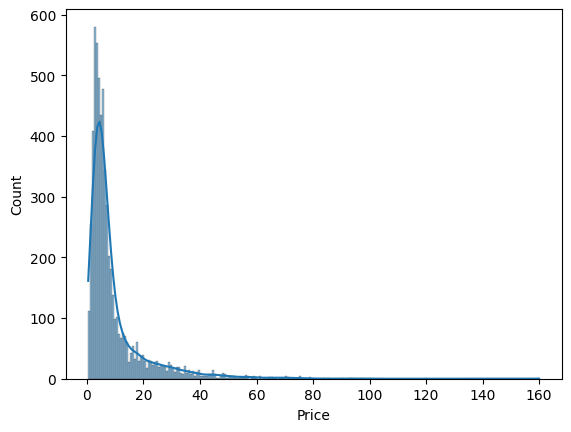

In [115]:
sns.histplot(df["Price"], kde=True)

This is a highly skewed distribution. Let us use log transformation on this column to see of that helps normalise the distribution.

Text(0.5, 0, 'Log(Price)')

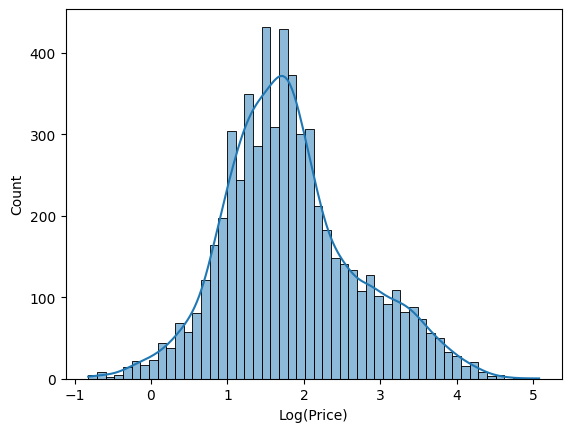

In [116]:
# Log transformation
sns.histplot(np.log(df["Price"]), kde=True)
plt.xlabel("Log(Price)")

Log Transformation has definitely helped in reducing the skew

In [117]:
df["price_log"] = np.log(df["Price"])

<font size="5">Price vs Location</font>

<Axes: xlabel='Location', ylabel='Price'>

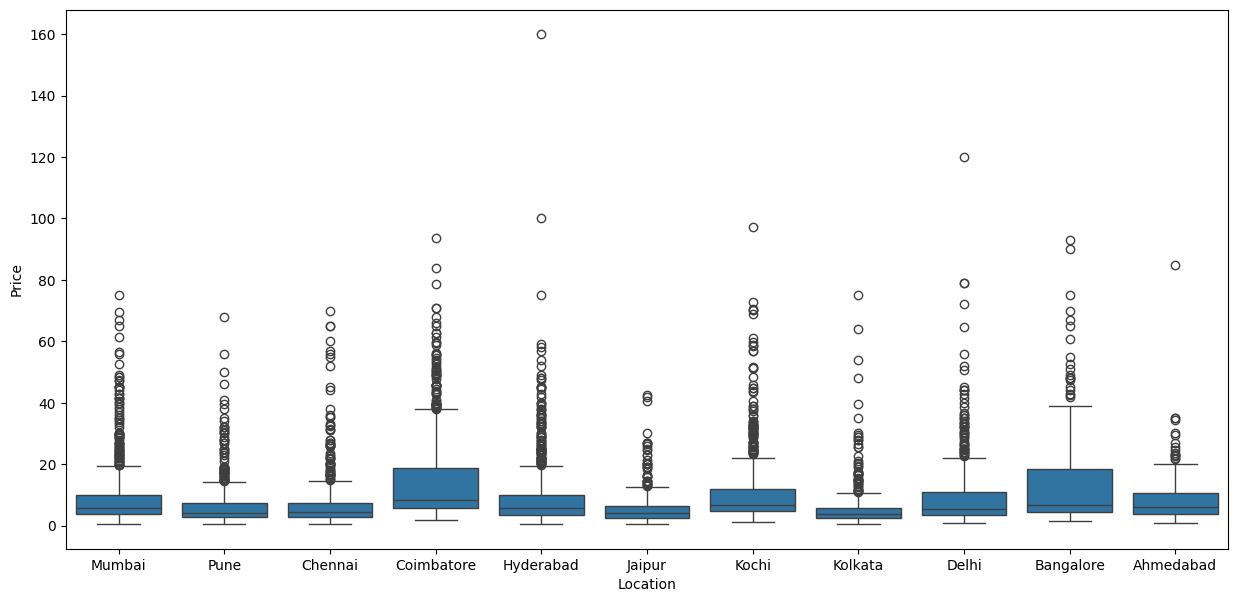

In [118]:
plt.figure(figsize=(15, 7))
sns.boxplot(x=df["Location"], y=df["Price"])

Price of used cars has a large IQR in Coimbatore and Bangalore

<font size="5">Kilometers_Driven</font>

<Axes: xlabel='Kilometers_Driven', ylabel='Count'>

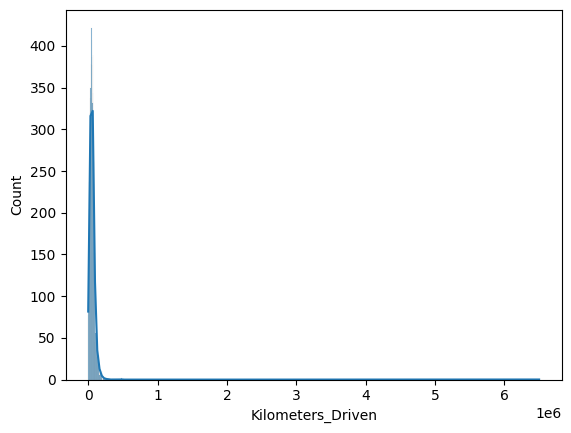

In [119]:
sns.histplot(df["Kilometers_Driven"], kde=True)

Text(0.5, 0, 'Log(Kilometers_Driven)')

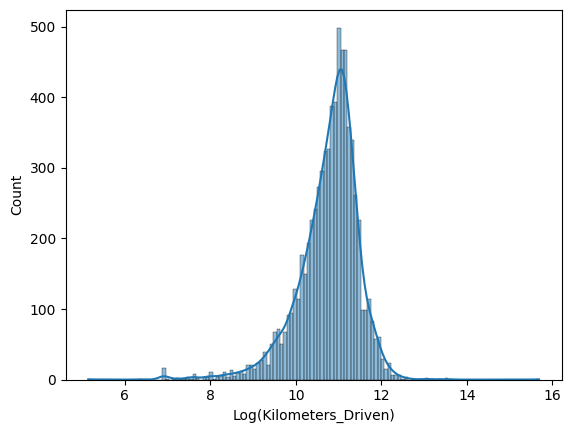

In [120]:
# Log transformation
sns.histplot(np.log(df["Kilometers_Driven"]), kde=True)
plt.xlabel("Log(Kilometers_Driven)")

Transformation has reduced the extreme skewness.

In [121]:
# Creating a new column with the transformed variable.
df["kilometers_driven_log"] = np.log(df["Kilometers_Driven"])

<font size="7">Bivariate Distributions<font>

/home/emmanuel/notebook/used_cars/cars_env/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


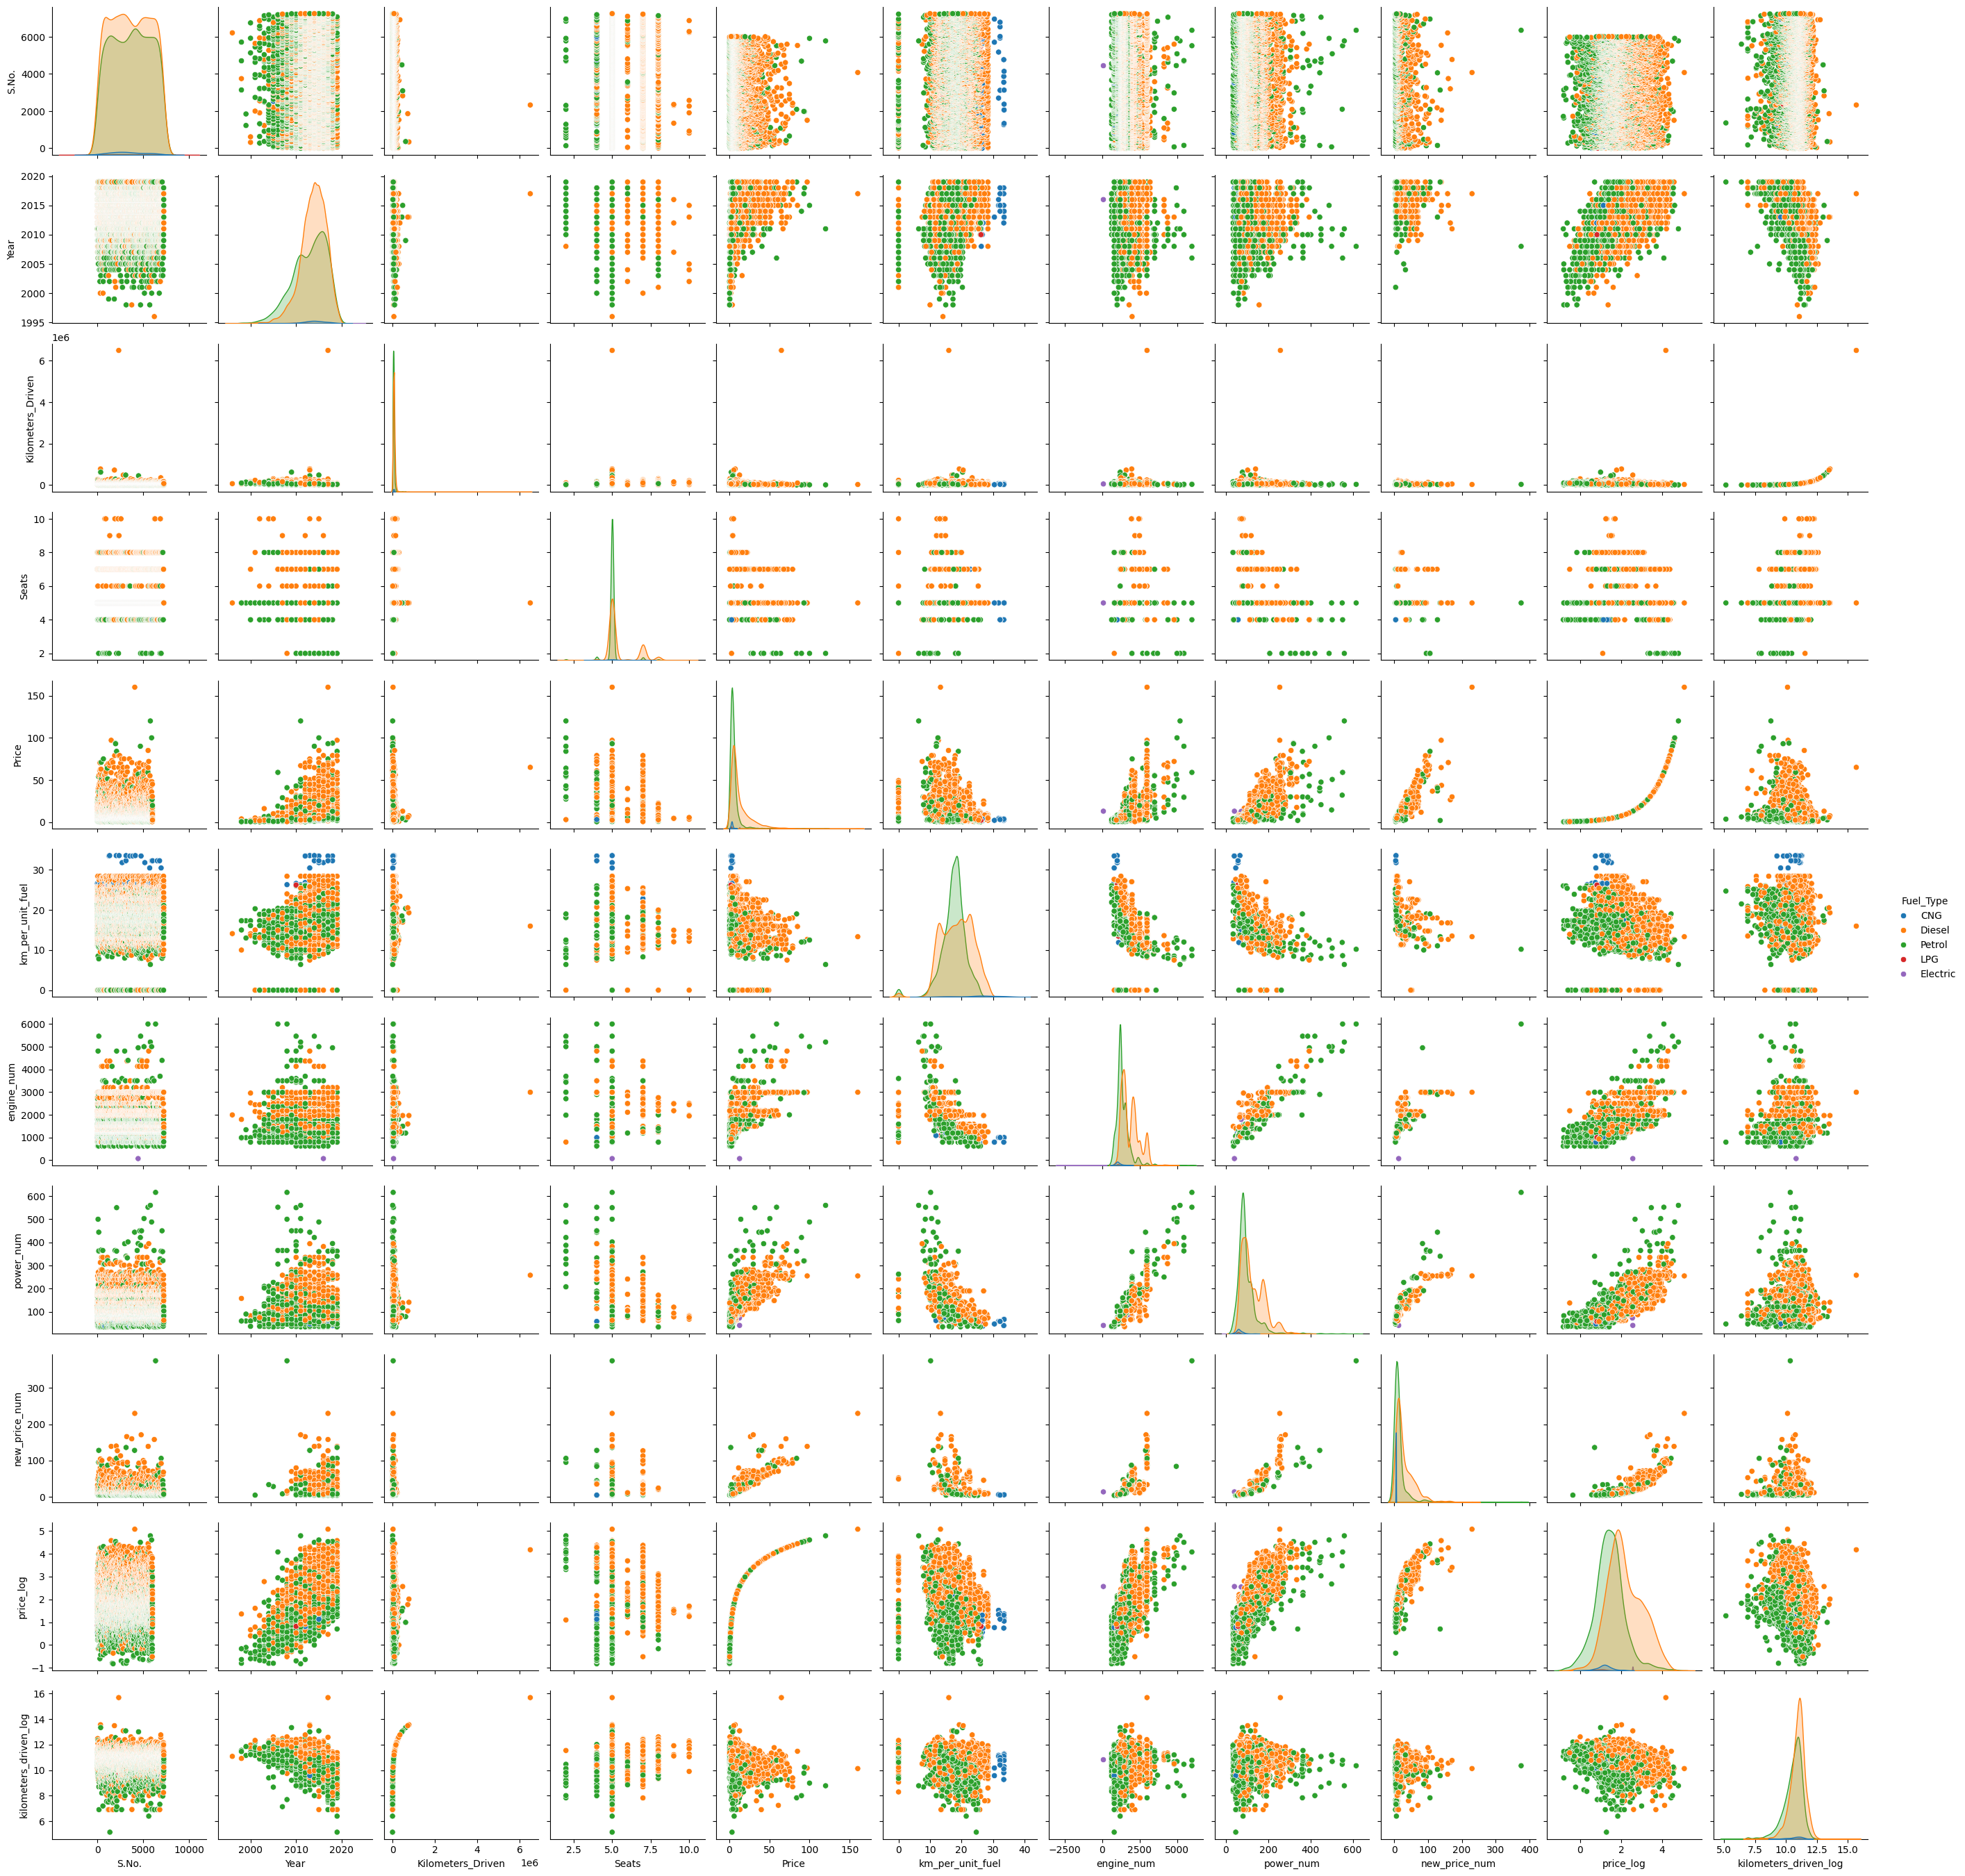

In [122]:
sns.pairplot(df, hue="Fuel_Type")

Zooming into these plots gives us a lot of information.

- S.No. does not capture any information that we were hoping for. The temporal element of variation is captured in the year column.
- Contrary to intuition Kilometers Driven does not seem to have a relationship with price.
- Price has a positive relationship with Year. Newer the car, higher the price.
- 2 seater cars are all luxury variants. Cars with 8-10 seats are exclusively mid to high range.
- Mileage does not seem to show much relationship with the price of used cars.
- Engine displacement and Power of the car have a positive relationship with the price.
- New Price and Used Car Price are also positively correlated, which is expected.
- Kilometers Driven has a peculiar relationship with the Year variable. Generally, newer the car lesser the distance it has travelled, but this is not always true.
- CNG cars are conspicuous outliers when it comes to Mileage. The mileage of these cars is very high.
- Mileage and power of newer cars is increasing owing to advancement in technology.
- Mileage has a negative correlation with engine displacement and power. More powerful the engine, more fuel it consumes in general.

<font size="5">Correlation between numeric variables</font>

<Axes: >

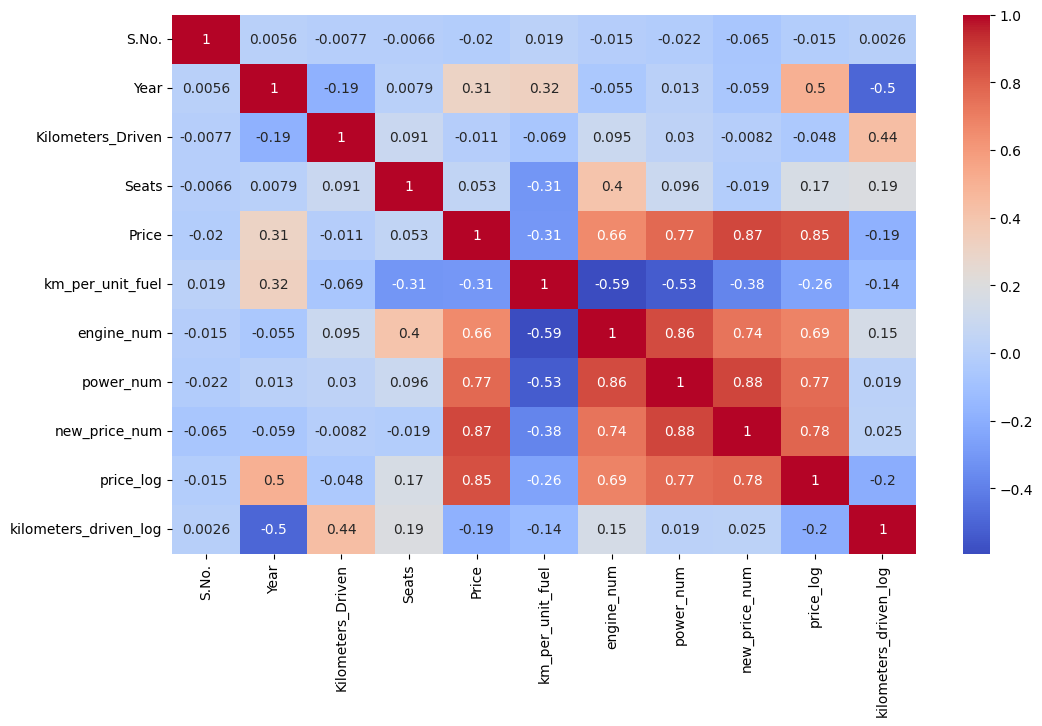

In [123]:
numeric_column = df.select_dtypes(exclude=['object'])
plt.figure(figsize=(12,7))
sns.heatmap(numeric_column.corr(), annot=True, cmap="coolwarm")

- Power and engine are important predictors of price
- We will have to work on imputing New Price missing values because this is a very important feature in predicting used car price accurately

<font size="5">Missing Value Treatment</font>

In [124]:
df.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                      53
Price                    1234
km_per_unit_fuel            2
engine_num                 46
power_num                 175
new_price_num            6247
Brand                       0
Model                       0
price_log                1234
kilometers_driven_log       0
dtype: int64

In [125]:
df[df["Seats"].isnull()]

S.No.                                          Name    Location  Year  \
194     194                            Honda City 1.5 GXI   Ahmedabad  2007   
208     208                          Maruti Swift 1.3 VXi     Kolkata  2010   
229     229                              Ford Figo Diesel   Bangalore  2015   
733     733                          Maruti Swift 1.3 VXi     Chennai  2006   
749     749                  Land Rover Range Rover 3.0 D      Mumbai  2008   
1294   1294                             Honda City 1.3 DX       Delhi  2009   
1327   1327                          Maruti Swift 1.3 ZXI   Hyderabad  2015   
1385   1385                            Honda City 1.5 GXI        Pune  2004   
1460   1460  Land Rover Range Rover Sport 2005 2012 Sport  Coimbatore  2008   
1917   1917                            Honda City 1.5 EXI      Jaipur  2005   
2074   2074                          Maruti Swift 1.3 LXI        Pune  2011   
2096   2096                     Hyundai Santro LP zipPlus  Coimbatore  2004   
2264   2264                           Toyota Etios Liva V        Pune  2012   
2325   2325                      Maruti Swift 1.3 VXI ABS        Pune  2015   
2335   2335                          Maruti Swift 1.3 VXi      Mumbai  2007   
2369   2369                             Maruti Estilo LXI     Chennai  2008   
2530   2530                       BMW 5 Series 520d Sedan       Kochi  2014   
2542   2542               Hyundai Santro GLS II - Euro II   Bangalore  2011   
2623   2623                       BMW 5 Series 520d Sedan        Pune  2012   
2668   2668                          Maruti Swift 1.3 VXi     Kolkata  2014   
2737   2737                             Maruti Wagon R Vx      Jaipur  2001   
2780   2780               Hyundai Santro GLS II - Euro II        Pune  2009   
2842   2842               Hyundai Santro GLS II - Euro II   Bangalore  2012   
3272   3272                       BMW 5 Series 520d Sedan      Mumbai  2008   
3404   3404                          Maruti Swift 1.3 VXi      Jaipur  2006   
3520   3520                       BMW 5 Series 520d Sedan       Delhi  2012   
3522   3522               Hyundai Santro GLS II - Euro II       Kochi  2012   
3800   3800                   Ford Endeavour Hurricane LE      Mumbai  2012   
3810   3810                   Honda CR-V AT With Sun Roof     Kolkata  2013   
3882   3882                             Maruti Estilo LXI     Kolkata  2010   
4011   4011                        Fiat Punto 1.3 Emotion        Pune  2011   
4152   4152                  Land Rover Range Rover 3.0 D      Mumbai  2003   
4229   4229                        Hyundai Santro Xing XG   Bangalore  2005   
4577   4577                       BMW 5 Series 520d Sedan       Delhi  2012   
4604   4604                     Honda Jazz Select Edition        Pune  2011   
4697   4697                        Fiat Punto 1.2 Dynamic       Kochi  2017   
4712   4712                        Hyundai Santro Xing XG        Pune  2003   
4952   4952                        Fiat Punto 1.4 Emotion     Kolkata  2010   
5015   5015                          Maruti Swift 1.3 VXi       Delhi  2006   
5185   5185                          Maruti Swift 1.3 LXI       Delhi  2012   
5270   5270                            Honda City 1.5 GXI   Bangalore  2002   
5893   5893                             Maruti Estilo LXI     Chennai  2008   
6042   6042                  Skoda Laura 1.8 TSI Ambition   Bangalore  2009   
6541   6541         Toyota Etios Liva Diesel TRD Sportivo   Bangalore  2012   
6544   6544                 Hyundai i20 new Sportz AT 1.4   Bangalore  2012   
6633   6633                           Mahindra TUV 300 P4     Kolkata  2016   
6643   6643                       BMW 5 Series 520d Sedan   Bangalore  2009   
6651   6651                          Maruti Swift 1.3 VXi     Kolkata  2015   
6677   6677                        Fiat Punto 1.4 Emotion      Jaipur  2010   
6685   6685                          Maruti Swift 1.3 VX

In [126]:
# I impute these missing values one by one, by taking median number of seats for the particular car,
# using the Brand and Model name
df.groupby(["Brand", "Model"], as_index=False)["Seats"].median()

Brand    Model  Seats
0    ambassador  classic    5.0
1          audi       a3    5.0
2          audi       a4    5.0
3          audi       a6    5.0
4          audi       a7    5.0
..          ...      ...    ...
217       volvo      s60    5.0
218       volvo      s80    5.0
219       volvo      v40    5.0
220       volvo     xc60    5.0
221       volvo     xc90    7.0

[222 rows x 3 columns]

In [127]:
# Impute missing Seats
df["Seats"] = df.groupby(["Brand", "Model"])["Seats"].transform(lambda x: x.fillna(x.median()))

/home/emmanuel/notebook/used_cars/cars_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [128]:
df[df["Seats"].isnull()]

S.No.               Name Location  Year  Kilometers_Driven Fuel_Type  \
2369   2369  Maruti Estilo LXI  Chennai  2008              56000    Petrol   
3882   3882  Maruti Estilo LXI  Kolkata  2010              40000    Petrol   
5893   5893  Maruti Estilo LXI  Chennai  2008              51000    Petrol   

     Transmission Owner_Type  Seats  Price  km_per_unit_fuel  engine_num  \
2369       Manual     Second    NaN   1.50              19.5      1061.0   
3882       Manual     Second    NaN   2.50              19.5      1061.0   
5893       Manual     Second    NaN   1.75              19.5      1061.0   

      power_num  new_price_num   Brand   Model  price_log  \
2369        NaN            NaN  maruti  estilo   0.405465   
3882        NaN            NaN  maruti  estilo   0.916291   
5893        NaN            NaN  maruti  estilo   0.559616   

      kilometers_driven_log  
2369              10.933107  
3882              10.596635  
5893              10.839581

In [129]:
# Maruti Estilo can accomodate 5
df["Seats"] = df["Seats"].fillna(5.0)

In [130]:
# Will use similar methods to fill massing values for engine, power and new price
df["engine_num"] = df.groupby(["Brand", "Model"])["engine_num"].transform(lambda x: x.fillna(x.median()))

df["power_num"] = df.groupby(["Brand", "Model"])["power_num"].transform(lambda x: x.fillna(x.median()))

df["new_price_num"] = df.groupby(["Brand", "Model"])["new_price_num"].transform(lambda x: x.fillna(x.median()))

/home/emmanuel/notebook/used_cars/cars_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/emmanuel/notebook/used_cars/cars_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/emmanuel/notebook/used_cars/cars_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/emmanuel/notebook/used_cars/cars_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/emmanuel/notebook/used_cars/cars_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/emmanuel/

In [131]:
df.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
Price                    1234
km_per_unit_fuel            2
engine_num                  0
power_num                  12
new_price_num            1512
Brand                       0
Model                       0
price_log                1234
kilometers_driven_log       0
dtype: int64

In [132]:
# There are still some missing values in power, mileage and new_price_num.
# There are a few car brands and models in our dataset that do not contain the new price information at all.
# I'll have to estimate the new price using median of the data.

cols = ["km_per_unit_fuel", "power_num", "new_price_num"]

for col in cols:
    df[col].fillna(df[col].median(), inplace=True)

In [133]:
df.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
Price                    1234
km_per_unit_fuel            0
engine_num                  0
power_num                   0
new_price_num               0
Brand                       0
Model                       0
price_log                1234
kilometers_driven_log       0
dtype: int64

In [134]:
# Drop the redundant columns
df.drop(columns=["S.No.", "Name", "Kilometers_Driven"], inplace=True)

# Drop the rows where 'Price' == NaN and proceed to modelling
df = df[df["Price"].notna()]

In [135]:
df.isnull().sum()

Location                 0
Year                     0
Fuel_Type                0
Transmission             0
Owner_Type               0
Seats                    0
Price                    0
km_per_unit_fuel         0
engine_num               0
power_num                0
new_price_num            0
Brand                    0
Model                    0
price_log                0
kilometers_driven_log    0
dtype: int64

<font size="7">Linear Model Building</font>
1. What i want to predict is the "Price". We will use the normalised version 'price_log' for modelling.
2. Before i proceed to modelling, we'll have to encode categorical features. I will drop categorical features like - Name
3. I'll split the data into train and test, to be able to evaluate the model that i build on the train data.
4. Build a Linear Regression model using the train data.
5. Verify linear regression assumptions.
6. Evaluate the model performance

<font size="5">Define dependent variable</font>

In [136]:
ind_vars = df.drop(["Price", "price_log"], axis=1)
dep_var = df[["Price", "price_log"]]

In [137]:
ind_vars

Location  Year Fuel_Type Transmission Owner_Type  Seats  \
0         Mumbai  2010       CNG       Manual      First    5.0   
1           Pune  2015    Diesel       Manual      First    5.0   
2        Chennai  2011    Petrol       Manual      First    5.0   
3        Chennai  2012    Diesel       Manual      First    7.0   
4     Coimbatore  2013    Diesel    Automatic     Second    5.0   
...          ...   ...       ...          ...        ...    ...   
6014       Delhi  2014    Diesel       Manual      First    5.0   
6015      Jaipur  2015    Diesel       Manual      First    5.0   
6016      Jaipur  2012    Diesel       Manual     Second    8.0   
6017     Kolkata  2013    Petrol       Manual      First    5.0   
6018   Hyderabad  2011    Diesel       Manual      First    5.0   

      km_per_unit_fuel  engine_num  power_num  new_price_num      Brand  \
0                26.60       998.0      58.16          5.510     maruti   
1                19.67      1582.0     126.20         16.060    hyundai   
2                18.20      1199.0      88.70          8.610      honda   
3                20.77      1248.0      88.76         11.270     maruti   
4                15.20      1968.0     140.80         53.140       audi   
...                ...         ...        ...            ...        ...   
6014             28.40      1248.0      74.00          7.880     maruti   
6015             24.40      1120.0      71.00          8.230    hyundai   
6016             14.00      2498.0     112.00         11.670   mahindra   
6017             18.90       998.0      67.10          5.510     maruti   
6018             25.44       936.0      57.60         11.685  chevrolet   

       Model  kilometers_driven_log  
0      wagon              11.184421  
1      creta              10.621327  
2       jazz              10.736397  
3     ertiga              11.373663  
4         a4              10.613246  
...      ...                    ...  
6014   swift              10.217020  
6015   xcent              11.512925  
6016    xylo              10.915088  
6017   wagon              10.736397  
6018    beat              10.757903  

[6019 rows x 13 columns]

In [138]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns= x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True
    )
    return x.astype(int)

ind_vars_enc = encode_cat_vars(ind_vars)
ind_vars_enc.head()

Year  Seats  km_per_unit_fuel  engine_num  power_num  new_price_num  \
0  2010      5                26         998         58              5   
1  2015      5                19        1582        126             16   
2  2011      5                18        1199         88              8   
3  2012      7                20        1248         88             11   
4  2013      5                15        1968        140             53   

   kilometers_driven_log  Location_Bangalore  Location_Chennai  \
0                     11                   0                 0   
1                     10                   0                 0   
2                     10                   0                 1   
3                     11                   0                 1   
4                     10                   0                 0   

   Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  \
0                    0               0                   0                0   
1                    0               0                   0                0   
2                    0               0                   0                0   
3                    0               0                   0                0   
4                    1               0                   0                0   

   Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0               0                 0                1              0   
1               0                 0                0              1   
2               0                 0                0              0   
3               0                 0                0              0   
4               0                 0                0              0   

   Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  \
0                 0                   0              0                 0   
1                 1                   0              0                 0   
2                 0                   0              0                 1   
3                 1                   0              0                 0   
4                 1                   0              0                 0   

   Transmission_Manual  Owner_Type_Fourth & Above  Owner_Type_Second  \
0                    1                          0                  0   
1                    1                          0                  0   
2                    1                          0                  0   
3                    1                          0                  0   
4                    0                          0                  1   

   Owner_Type_Third  Brand_audi  Brand_bentley  Brand_bmw  Brand_chevrolet  \
0                 0           0              0          0                0   
1                 0           0              0          0                0   
2                 0           0              0          0                0   
3                 0           0              0          0                0   
4                 0           1              0          0                0   

   Brand_datsun  Brand_fiat  Brand_force  Brand_ford  Brand_honda  \
0             0           0            0           0            0   
1             0           0            0           0            0   
2             0           0            0           0            1   
3             0           0            0           0            0   
4             0           0            0           0            0   

   Brand_hyundai  Brand_isuzu  Brand_jaguar  Brand_jeep  Brand_lamborghini  \
0              0            0             0           0                  0   
1              1            0             0           0                  0   
2              0            0             0           0                  0   
3              0            0             0           0                  0   
4              0            0             0           0                  0   

   Brand_land  B

<font size="5">Split the data into train and test</font>

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    ind_vars_enc, dep_var, test_size=0.3, random_state=1
)

In [140]:
print("Number of rows in train data: ", X_train.shape[0])
print("Number of rows in test data: ", X_test.shape[0])

Number of rows in train data:  4213
Number of rows in test data:  1806


<font size="5">Fitting a linear model</font>

In [141]:
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
X_train = sm.add_constant(X_train)
# Add constant to test data
X_test = sm.add_constant(X_test)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)
    return olsmodel.fit()


olsmodel1 = build_ols_model(X_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     405.5
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        05:18:45   Log-Likelihood:                 1338.3
No. Observations:                4213   AIC:                            -2213.
Df Residuals:                    3981   BIC:                            -740.4
Df Model:                         231                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

- Both the R-squared and Adjusted R squared of our model are very high. This is a clear indication that I have been able to create a very good model that is able to explain variance in price of used cars for upto 95%
- The model is not an underfitting model.
- To be able to make statistical inferences from our model, I will have to test that the linear regression assumptions are followed.
- Before we move on to assumption testing, I'll do a quick performance check on the test data.

In [142]:
y_train

Price  price_log
188    4.60   1.526056
4178   6.90   1.931521
3888   6.14   1.814825
2242  13.70   2.617396
2594   5.95   1.783391
...     ...        ...
905    2.85   1.047319
5192   3.41   1.226712
3980   2.10   0.741937
235   19.64   2.977568
5157   2.75   1.011601

[4213 rows x 2 columns]

In [143]:
import math

# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_perf(olsmodel, X_train, X_test):
    # Insample Prediction
    y_pred_train_pricelog = olsmodel.predict(X_train)
    y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
    y_train_Price = y_train["Price"]

    # Prediction on test data
    y_pred_test_pricelog = olsmodel.predict(X_test)
    y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
    y_test_Price = y_test["Price"]

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train_Price, y_train_Price),
                    rmse(y_pred_test_Price, y_test_Price),
                ],
                "MAE": [
                    mae(y_pred_train_Price, y_train_Price),
                    mae(y_pred_test_Price, y_test_Price),
                ],
                "MAPE": [
                    mape(y_pred_train_Price, y_train_Price),
                    mape(y_pred_test_Price, y_test_Price),
                ],
            }
        )
    )


# Checking model performance
model_perf(olsmodel1, X_train, X_test)  # High Overfitting.

    Data       RMSE       MAE       MAPE
0  Train   2.738253  1.198025  13.015614
1   Test  14.208480  1.989642  15.321978


- Root Mean Squared Error of train and test data is starkly different, indicating that our model is overfitting the train data.
- Mean Absolute Error indicates that our current model is able to predict used cars prices within mean error of 1.9 lakhs on test data.
- The units of both RMSE and MAE are same - Lakhs in this case. But RMSE is greater than MAE because it peanalises the outliers more.
- Mean Absolute Percentage Error is ~15% on the test data.

<font size="5">Checking the Linear Regression Assumptions</font>

1. <b>No Multicollinearity</b>
2. <b>Mean of residuals should be 0</b>
3. <b>No Heteroscedasticity</b>
4. <b>Linearity of variables</b>
5. <b>Normality of error terms</b>

<font size="5">Checking Assumption 1: No Multcolinearity</font>

I'll use VIF, to check if there is multicollinearity in the data.

Features having a VIF score >5 will be dropped/treated till all features have a VIF score <5

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

/home/emmanuel/notebook/used_cars/cars_env/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/home/emmanuel/notebook/used_cars/cars_env/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/home/emmanuel/notebook/used_cars/cars_env/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


              feature        VIF
0               const   0.000000
1                Year   2.848848
2               Seats  16.754360
3    km_per_unit_fuel   5.797986
4          engine_num  23.632000
..                ...        ...
260        Model_xylo        inf
261        Model_yeti        inf
262          Model_z4   1.419572
263         Model_zen        inf
264        Model_zest        inf

[265 rows x 2 columns]


In [145]:
# There are a few variables with high VIF.
# The current model is extreamly complex. Let's first bin the Brand and Model columns.
# This wouldn't essential reduce multicollinearity in the data, but it will help me make the dataset more managable
df.groupby(["Brand", "Model"])["new_price_num"].mean().sort_values(ascending=False)

Brand          Model  
mercedes-benz  s-class    171.000000
bmw            7          157.230769
porsche        cayenne    136.000000
audi           rs5        128.000000
land           rover      119.887000
                             ...    
maruti         eeco         4.900000
renault        kwid         4.794750
hyundai        santro       4.550000
maruti         alto         4.366364
datsun         redi-go      4.153333
Name: new_price_num, Length: 215, dtype: float64

In [146]:
# I"ll create a new variable Car Category by binning the new_price_number
# Create a new variable - Car Category
df1 = df.copy()
df1["car_category"] = pd.cut(
    x=df["new_price_num"],
    bins= [0, 15, 30, 50, 200],
    labels= ["Budget_Friendly", "Mid_Range", "Luxury_Cars", "Ultra_Luxury"]
)


# Drop the Brand and Model columns.
df1.drop(columns=["Brand", "Model"], axis=1, inplace=True)

In [147]:
df1.head()

Location  Year Fuel_Type Transmission Owner_Type  Seats  Price  \
0      Mumbai  2010       CNG       Manual      First    5.0   1.75   
1        Pune  2015    Diesel       Manual      First    5.0  12.50   
2     Chennai  2011    Petrol       Manual      First    5.0   4.50   
3     Chennai  2012    Diesel       Manual      First    7.0   6.00   
4  Coimbatore  2013    Diesel    Automatic     Second    5.0  17.74   

   km_per_unit_fuel  engine_num  power_num  new_price_num  price_log  \
0             26.60       998.0      58.16           5.51   0.559616   
1             19.67      1582.0     126.20          16.06   2.525729   
2             18.20      1199.0      88.70           8.61   1.504077   
3             20.77      1248.0      88.76          11.27   1.791759   
4             15.20      1968.0     140.80          53.14   2.875822   

   kilometers_driven_log     car_category  
0              11.184421  Budget_Friendly  
1              10.621327        Mid_Range  
2              10.736397  Budget_Friendly  
3              11.373663  Budget_Friendly  
4              10.613246     Ultra_Luxury

In [148]:
ind_vars = df1.drop(columns=["Price", "price_log"], axis=1)
dep_var = df1[["price_log", "Price"]]

# Dummy encoding
ind_vars_enc = encode_cat_vars(ind_vars)

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    ind_vars_enc, dep_var, test_size=0.3, random_state=1
)

print("Number of rows in X_train data =", X_train.shape[0])
print("Number of rows in X_test data =", X_test.shape[0], "\n\n")

# Statsmodel api does not add a constant bu default. I need to add it explicitly
X_train = sm.add_constant(X_train)
# Add constant to test data
X_test = sm.add_constant(X_test)

# Fit linear model on new dataset
olsmodel2 = build_ols_model(X_train)
print(olsmodel2.summary())

Number of rows in X_train data = 4213
Number of rows in X_test data = 1806 


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     1289.
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        05:19:26   Log-Likelihood:                -632.04
No. Observations:                4213   AIC:                             1322.
Df Residuals:                    4184   BIC:                             1506.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

The R squared and adjusted r squared values have decreased, but are still quite high indicating that I have been able to capture most of the information of the previous model even after reducing the number of predictor features.

As I try to decrease overfitting, the r squared of my train model is expected to decrease

In [149]:
# Check VIF
print(checking_vif(X_train))

                      feature            VIF
0                       const  766721.338370
1                        Year       2.024354
2                       Seats       1.780452
3            km_per_unit_fuel       2.695494
4                  engine_num       8.862677
5                   power_num       7.635340
6               new_price_num       6.339687
7       kilometers_driven_log       1.594150
8          Location_Bangalore       2.395583
9            Location_Chennai       2.966269
10        Location_Coimbatore       3.465296
11             Location_Delhi       3.096401
12         Location_Hyderabad       3.841727
13            Location_Jaipur       2.692865
14             Location_Kochi       3.465316
15           Location_Kolkata       3.043613
16            Location_Mumbai       3.920170
17              Location_Pune       3.308488
18           Fuel_Type_Diesel      27.811806
19         Fuel_Type_Electric       1.031045
20              Fuel_Type_LPG       1.163766
21        

The R squared and adjusted r squared values have decreased, but are still quite high indicating that I have been able to capture most of the information of the previous model even after reducing the number of predictor features by a huge extent.

As I try to decrease overfitting, the r squared of my train model is expected to decrease.

In [150]:
# Checking model performance
model_perf(olsmodel2, X_train, X_test)

    Data      RMSE       MAE       MAPE
0  Train  6.080309  2.183466  22.546192
1   Test  4.746520  2.025021  19.975082


- The RMSE on train data has increased now but has decreased on test data.
- The RMSE values on both the dataset being close to each other indicate that the model is not overfitting the training data anymore.
- Reducing overfitting has caused the MAE to increase on training data but the test MAE has infact reduced.
- MAPE on test data has increased to ~20%

I have managed to control overfitting and reduce the test data error.

Let's now remove multicollinearity from the model.

<font size="5">Removing Multicollinearity</font>

To remove multicollinearity

1. Drop every column that has VIF score greater than 5, one by one.
2. Look at the adjusted R square of all these models
3. Drop the Variable that makes least change in Adjusted-R square
4. Check the VIF Scores again
5. Continue till you get all VIF scores under 5

In [151]:
# Method to drop all the multicollinear column and choose which one we should drop
def treating_multicollinearity(high_vif_columns, x_train, x_test):
    """
    Drop every column that has VIF score greater then 5, one by one.
    Look at the adjusted R square of all these models.
    Look at the RMSE of all these models on test data.
    """
    adj_rsq_scores = []
    rmse_test_data = []

    # Build ols models by dropping one of these at a time and observe the Adjusted
    for cols in high_vif_columns:
        train = x_train.loc[:, ~x_train.columns.str.startswith(cols)]
        test = x_test.loc[:, ~x_test.columns.str.startswith(cols)]
        # Create the model
        olsres = build_ols_model(train)
        # Adj R-Sq
        adj_rsq_scores.append(olsres.rsquared_adj)
        # RMSE (Test data)
        y_pred_test_pricelog = olsres.predict(test)
        y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
        y_test_Price = y_test["Price"]
        rmse_test_data.append(rmse(y_pred_test_Price, y_test_Price))

    # Add new Adj_Rsq and RMSE after dropping each column
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj_rsq_after_dropping_col": adj_rsq_scores,
            "Test RMSE": rmse_test_data,
        }
    ).sort_values(by="Adj_rsq_after_dropping_col", ascending=False)

    print(temp)
    print("\n\n")

In [152]:
high_vif_columns = [
    "engine_num",
    "power_num",
    "new_price_num",
    "Fuel_Type",
    "car_category"
]
treating_multicollinearity(high_vif_columns, X_train, X_test)

             col  Adj_rsq_after_dropping_col  Test RMSE
0     engine_num                    0.894960   4.724890
2  new_price_num                    0.894903   4.646874
4   car_category                    0.888784   5.030721
3      Fuel_Type                    0.881558   5.330555
1      power_num                    0.873557   5.207949





In [153]:
# Dropping Fuel_Type would have the maximum impact on predictive power of the model (amongst the variables being considered)
# We'll drop engine_num and check the vif again

# Drop 'engine_num' from train and test
col_to_drop = "engine_num"
X_train = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train)
print("VIF after dropping", col_to_drop)
print(vif)

VIF after dropping engine_num
                      feature            VIF
0                       const  763594.177634
1                        Year       2.016720
2                       Seats       1.504475
3            km_per_unit_fuel       2.326030
4                   power_num       2.794545
5               new_price_num       6.334287
6       kilometers_driven_log       1.593801
7          Location_Bangalore       2.395576
8            Location_Chennai       2.965192
9         Location_Coimbatore       3.464302
10             Location_Delhi       3.095609
11         Location_Hyderabad       3.838429
12            Location_Jaipur       2.692793
13             Location_Kochi       3.464940
14           Location_Kolkata       3.042340
15            Location_Mumbai       3.920130
16              Location_Pune       3.308487
17           Fuel_Type_Diesel      27.810364
18         Fuel_Type_Electric       1.029834
19              Fuel_Type_LPG       1.161968
20           Fuel_Type_Pe

In [154]:
# Dropping engine_num has brought the VIF of power_num below 5
# new_price_num, Fuel_Type and car_category still show some multicollinearity

# Check which one of these should we drop next
high_vif_columns = [
    "new_price_num",
    "Fuel_Type",
    "car_category"
]
treating_multicollinearity(high_vif_columns, X_train, X_test)

             col  Adj_rsq_after_dropping_col  Test RMSE
0  new_price_num                    0.894409   4.630491
2   car_category                    0.887927   4.948107
1      Fuel_Type                    0.876224   5.226862





In [155]:
# Drop 'engine_num' from train and test
col_to_drop = "new_price_num"
X_train = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train)
print("VIF after dropping", col_to_drop)
print(vif)

VIF after dropping new_price_num
                      feature            VIF
0                       const  763522.924798
1                        Year       2.016527
2                       Seats       1.504051
3            km_per_unit_fuel       2.317011
4                   power_num       2.643537
5       kilometers_driven_log       1.593640
6          Location_Bangalore       2.394881
7            Location_Chennai       2.963243
8         Location_Coimbatore       3.459148
9              Location_Delhi       3.094870
10         Location_Hyderabad       3.836209
11            Location_Jaipur       2.691666
12             Location_Kochi       3.462123
13           Location_Kolkata       3.041931
14            Location_Mumbai       3.917677
15              Location_Pune       3.306305
16           Fuel_Type_Diesel      27.808036
17         Fuel_Type_Electric       1.029763
18              Fuel_Type_LPG       1.161932
19           Fuel_Type_Petrol      28.313368
20        Transmission

I have removed multicollinearity from the data now

Fuel_Type variables are showing high vif because most cars are either diesel and petrol. These two features are correlated with each other.

I will not drop this variable from the model because this will not affect the interpretation of other features in the model

<font size="5">Let's look at the model with the data that does not have multicollinearity</font>

In [156]:
# Fit linear model on new dataset
olsmodel3 = build_ols_model(X_train)
print(olsmodel3.summary())

print("\n\n")

# Checking model performance
model_perf(olsmodel3, X_train, X_test)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1373.
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        05:19:27   Log-Likelihood:                -653.37
No. Observations:                4213   AIC:                             1361.
Df Residuals:                    4186   BIC:                             1532.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

- Model R-squared and Adjusted R squared is almost the same as the previous model - olsmodel2.

- Removal of multicollinear variable has not causes any information loss in the model.

- Before we can make inferences from this model, let us ensure that other model assumptions are followed.

<font size="5">Checking Assumption 2: Mean of residuals should be 0</font>

In [157]:
residuals = olsmodel3.resid
np.mean(residuals)

-4.755494465919164e-13

Mean of redisuals is very close to 0. The second assumption is also satisfied.

<font size="5">Checking Assumption 3: No Heteroscedasticity</font>
- Homoscedacity - If the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form a funnel shape or any other non symmetrical shape.

I'll use Goldfeldquandt Test to test the following hypothesis

Null hypothesis : Residuals are homoscedastic Alternate hypothesis : Residuals have hetroscedasticity

alpha = 0.05

In [158]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.8961927873301799), ('p-value', 0.9937605394980384)]

Since p-value > 0.05 we cannot reject the Null Hypothesis that the residuals are homoscedastic.

Assumptions 3 is also satisfied by our olsmodel3.

<font size="5">Checking Assumption 4: Linearity of variables</font>

Predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x axis.

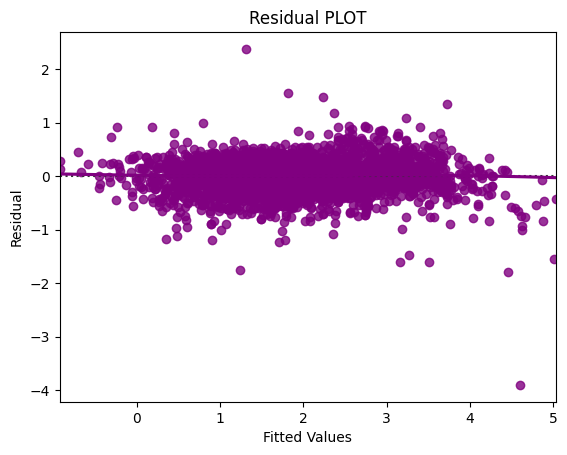

In [159]:
# predicted values
fitted = olsmodel3.fittedvalues

#sns.set_style("whitegrid")
sns.residplot(x=fitted, y=residuals, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Assumptions 4 is satisfied by our olsmodle3. There is no pattern in the residual vs fitted values plot

<font size="5">Checking Assumption 5: Normality of error terms</font>

The residuals should be normally distributed.

/tmp/ipykernel_7356/753425079.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: ylabel='Density'>

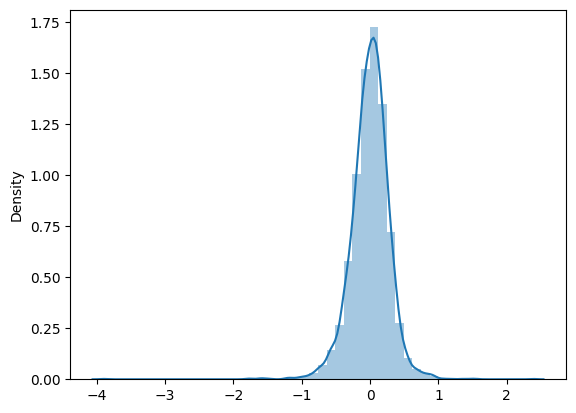

In [160]:
# Plot histogram of residuals
sns.distplot(residuals)

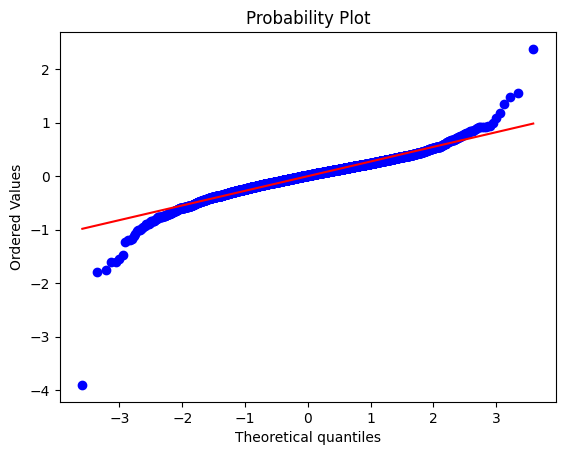

In [161]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

The residuals have a close to normal distribution. Assumption 5 is also satisfied. I should further investigate these values in the tails where I have made huge residual errors.

Now that I have seen that olsmodel3 follows all the linear regression assumptions. Let's use that model to draw inferences.

In [162]:
print(olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1373.
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        05:19:28   Log-Likelihood:                -653.37
No. Observations:                4213   AIC:                             1361.
Df Residuals:                    4186   BIC:                             1532.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<font size="6">Observations from the model</font>

1. With the linear regression model i've been able to capture ~90 variation in our data.
2. The model indicates that the most significant predictors of price of used cars are -
   - The year of manufacturing
   - Number of seats in the car
   - Power of the engine
   - Mileage
   - Kilometers Driven
   - Location
   - Fuel_Type
   - Transmission - Automatic/Manual
   - Car Category - budget brand to ultra luxury The p-values for these predictors are <0.05 in our final model
3. Newer cars sell for higher prices. 1 unit increase in the year of manufacture leads to [ exp(0.1158) = 1.12 Lakh ] increase in the price of the vehicle, when everything else is constant.

In [163]:
np.exp(0.0119)

1.011971086697384

<b>It is important to note here that the predicted values are log(price) and therefore coefficients have to be converted accordingly to understand their influence in price.</b>

1. As the number of seats increases, the price of the car increases - exp(0.0119) = 1.01 Lakhs
2. Mileage is inversely correlated with Price. Generally, high mileage cars are the lower budget cars.

<b>It is important to note here that correlation is not equal to causation. That is to say that increase in Mileage does not lead to a drop in prices. It can be understood in such a way that the cars with high mileage do not have a high power engine and therefore have low prices.</b>

1. Kilometers Driven have a negative relationship with the price which is intuitive. A car that has been driven more will have more wear and tear and hence sell at a lower price, everything else being 0.
2. The categorical variables are a little hard to interpret. But it can be seen that all the car_category variables in the dataset have a positive relationship with the Price and the magnitude of this positive relationship increases as the brand category moves to the luxury brands. It will not be incorrect to interpret that the dropped car_category variable for budget friendly cars would have a negative relationship with the price (because the other 3 are increasingly positive.)

<font size="6">Business Insights and Recommendations</font>

- My final Linear Regression model has a MAPE of 20% on the test data, which means that we are able to predict within 20% of the price value. This is a very good model and I can use this model in production.
- Some southern markets tend to have higher prices. It might be a good strategy to plan growth in southern cities using this information. Markets like Kolkata(coeff = -0.2) are very risky and we need to be careful about investments in this area.
- I'll have to analyse the cost side of things before I can talk about profitability in the business. I should gather data regarding that.
